In [7]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

# Dynamic patch for OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
original_init = OneHotEncoder.__init__

def new_init(self, *args, **kwargs):
    if 'sparse' in kwargs:
        kwargs['sparse_output'] = kwargs.pop('sparse')
    original_init(self, *args, **kwargs)

OneHotEncoder.__init__ = new_init

# Now you can safely import and use LazyRegressor
import lazypredict
from lazypredict.Supervised import LazyRegressor

regressor = LazyRegressor()

# Continue with your code to load data and use the regressor

In [8]:
df = pd.read_csv("ERBB_bioactivity_data_pubchem.csv")

In [10]:
X = df.drop('pAC50', axis=1)
Y = df.pAC50

In [11]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(79, 204)

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [13]:
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [00:02<00:00, 15.82it/s]


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000044 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 348
[LightGBM] [Info] Number of data points in the train set: 63, number of used features: 116
[LightGBM] [Info] Start training from score 4.610983
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

100%|██████████| 42/42 [00:02<00:00, 15.87it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000168 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 348
[LightGBM] [Info] Number of data points in the train set: 63, number of used features: 116
[LightGBM] [Info] Start training from score 4.610983
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [14]:
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,15526573830427603731623986425728640953827553417...,-3556086264388257619517744533205898781072521507...,16968089719353332456927282161600433474097905664.00,0.02
KernelRidge,12.47,-25.27,4.61,0.01
QuantileRegressor,1.44,-0.01,0.90,0.01
ElasticNet,1.44,0.00,0.90,0.01
Lasso,1.44,0.00,0.90,0.01
ElasticNetCV,1.44,0.00,0.90,0.55
DummyRegressor,1.44,0.00,0.90,0.00
LassoLars,1.44,0.00,0.90,0.01
LassoCV,1.44,0.00,0.90,0.62


# Data Visualization

[(0.0, 1.0)]

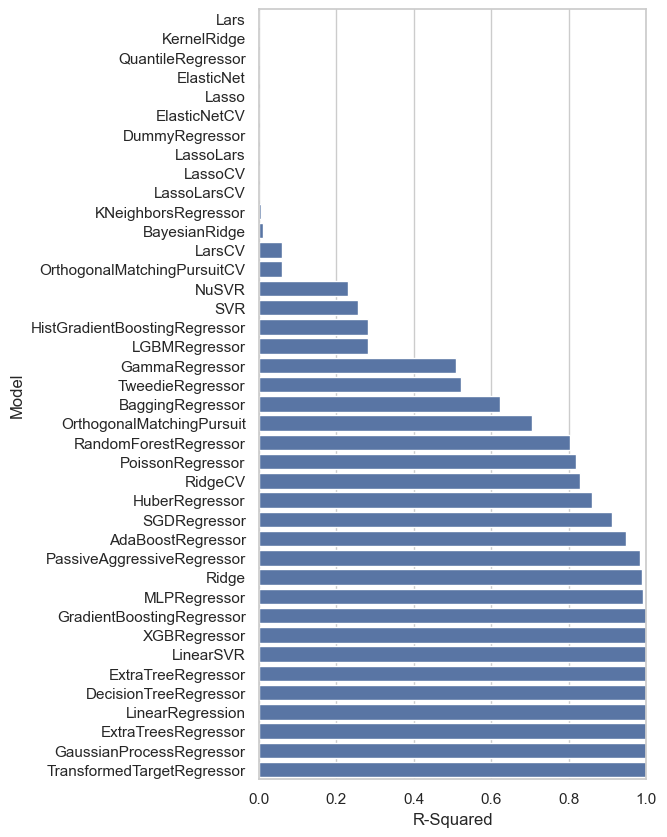

In [15]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

RMSE Values

[(0.0, 10.0)]

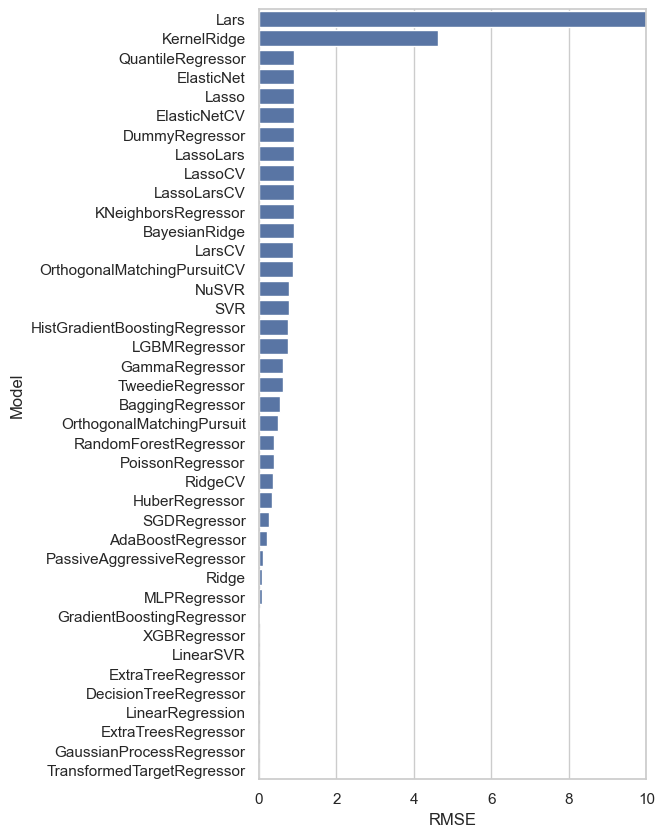

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

Calculation Time

[(0.0, 10.0)]

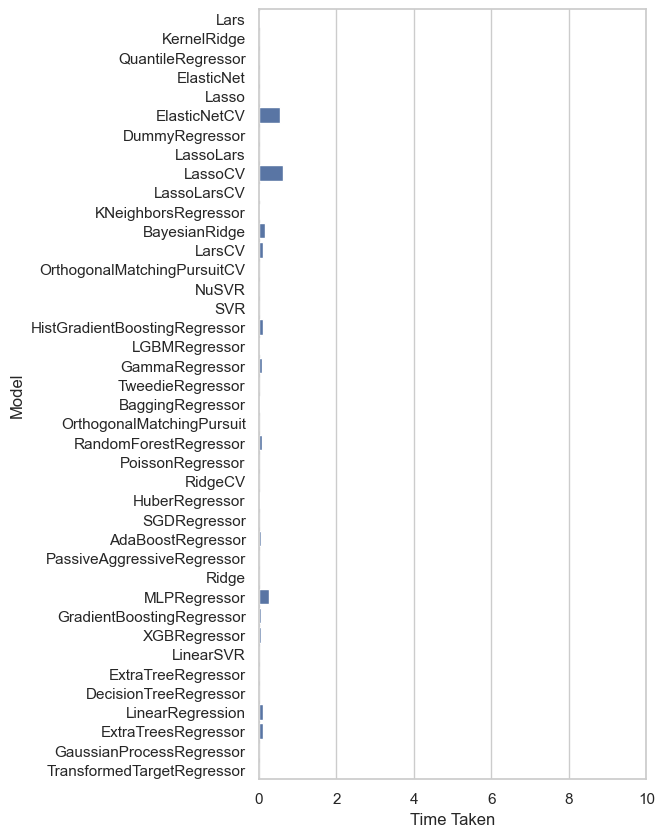

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))